In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## toyata 가격 예측 회귀 분석

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\pc\\Desktop\\python\\머신러닝 A to Z\\Part 05~11) Machine Learning\\06. 회귀분석\\실습코드'

In [4]:
# 데이터 불러오기
corolla = pd.read_csv("C:/Users/pc/Desktop/python/머신러닝 A to Z/Part 05~11) Machine Learning/06. 회귀분석/Data/part2_data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
# 데이터 수와 변수의 수 확인하기
ncar = corolla.shape[0] #이게 데이터 수 
nvar = corolla.shape[1] #이게 변수의 수
print(ncar)
print(nvar)

1436
37


## 범주형 변수를 이진형 변수로 변환

In [8]:
## 가변수 생성

#일단은 fuletype 열에 어떠한 변수들이 있는지 unique로 확인  

corolla.Fuel_Type.unique()

#총 3개의 변수 확인 3개의 변수를 명목형 변수로 처리해야 함 , 3개의 factor라면 명목형 변수는 최소한 2개는 필요함 

dummy_p =np.repeat(0,ncar)
dummy_d =np.repeat(0,ncar)
dummy_c =np.repeat(0,ncar)

#repeat함수를 통해 행의 개수 만큼 0을 만들어줌 



In [11]:
dummy_c

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
#Fule_type이 petrol인 친구들을 true or false로 뱉고 이들을 array로 만듦
p_index = np.array(corolla.Fuel_Type == 'Petrol')
d_index = np.array(corolla.Fuel_Type == 'Diesel')
c_index = np.array(corolla.Fuel_Type == 'CNG')

### **자 중요한건 여기 POINT**

-  아까 만들었던 0으로만 이루어져 있던 dummy_p를 가지고 dummy_p[p_index] = 1를 하면 p_index가 true값일 대 dummy_p에 1값이 들어감

In [22]:
dummy_p[p_index] = 1
dummy_d[d_index] = 1
dummy_c[c_index] = 1

print(dummy_c)
print(dummy_p)
print(dummy_d)

[0 0 0 ... 0 0 0]
[0 0 0 ... 1 1 1]
[1 1 1 ... 0 0 0]


## 불필요한 변수 제거 및 가변수 추가


**우선은 여기서 만든 dummy variable을 하나의 데이터 프레임으로 합치기**

In [23]:
Fuel = pd.DataFrame({'Petrol':dummy_p,'Diesel':dummy_d,'CNG':dummy_c})

In [24]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


#### 이제 기존의 data_frame에서 필요없는 변수인 id와 model을 지우고 fuel_type도 dummy변수로 만들었으니 지워줌

In [49]:
corolla_ = corolla.drop(['Id','Model','Fuel_Type'],axis = 1,inplace = False)
mlr_data = pd.concat((corolla_,Fuel),axis = 1)
mlr_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,1,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,1,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,1,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,1,0,0


In [50]:
# bias 추가 -> 상수항 추가
 
mlr_data = sm.add_constant(mlr_data,has_constant = 'add')
mlr_data


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

**이전에 다중 회귀분석에서는 column명을 가져올때 mlr_data[column]으로 직접 입력해서 가져와줬는데 difference함수를 통해 빼고 가져오기 가능**

In [52]:
feature_columns = list(mlr_data.columns.difference(['Price']))
feature_columns

['ABS',
 'Age_08_04',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic',
 'Automatic_airco',
 'BOVAG_Guarantee',
 'Backseat_Divider',
 'Boardcomputer',
 'CD_Player',
 'CNG',
 'Central_Lock',
 'Cylinders',
 'Diesel',
 'Doors',
 'Gears',
 'Guarantee_Period',
 'HP',
 'KM',
 'Met_Color',
 'Metallic_Rim',
 'Mfg_Month',
 'Mfg_Year',
 'Mfr_Guarantee',
 'Mistlamps',
 'Petrol',
 'Power_Steering',
 'Powered_Windows',
 'Quarterly_Tax',
 'Radio',
 'Radio_cassette',
 'Sport_Model',
 'Tow_Bar',
 'Weight',
 'cc',
 'const']

- **이렇게 y를 제외 한 x의변수의 naming을 완료 했다.**
- **추가적으로 y 값은 Price 열값을 넣어서 학습과 검증 데이터로 분할을 함** 

In [33]:

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [38]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

In [39]:
 ## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     314.8
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:26:39   Log-Likelihood:                -8434.3
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     971   BIC:                         1.710e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -269.3586    133.484     -2.018      0.044    -531.308      -7.409
Age_08_04         -114.5474      4.114    -27.841      0.000    -122.621    -106.473
Airbag_1            13.5536    254.335      0.053      0.958    -485.556     512.663
Airbag_2          -103.1582    135.237     -0.763      0.446    -368.549     162.233
Airco              267.1457     94.231      2.835      0.005      82.225     452.066
Automatic          295.2529    155.942      1.893      0.059     -10.770     601.275
Automatic_airco   1956.5096    200.981      9.735      0.000    1562.103    2350.916
BOVAG_Guarantee    619.2295    137.797      4.494      0.000     348.815     889.644
Backseat_Divider  -338.6601    134.735     -2.514      0.012    -603.065     -74.255
Boardcomputer     -219.4674    123.627     -1.775      0.076    -462.074      23.139
CD_Player          174.5094    104.077      1.677      0.094     -29.732     378.751
CNG              -1864.5884    255.999     -7.284      0.000   -2366.963   -1362.214
Central_Lock      -204.6535    146.785     -1.394      0.164    -492.706      83.399
Cylinders           -0.0342      0.002    -13.762      0.000      -0.039      -0.029
Diesel            1141.2465    328.589      3.473      0.001     496.420    1786.073
Doors               15.0752     42.732      0.353      0.724     -68.783      98.933
Gears               12.4531    205.269      0.061      0.952    -390.369     415.275
Guarantee_Period    75.8644     13.905      5.456      0.000      48.577     103.152
HP                  43.1931      6.289      6.868      0.000      30.852      55.535
KM                  -0.0160      0.001    -12.317      0.000      -0.019      -0.013
Met_Color          -42.9375     78.032     -0.550      0.582    -196.069     110.193
Metallic_Rim       158.1722     98.664      1.603      0.109     -35.447     351.791
Mfg_Month          -90.0117     10.738     -8.382      0.000    -111.085     -68.939
Mfg_Year            -0.0944      0.989     -0.095      0.924      -2.036       1.847
Mfr_Guarantee      260.5565     76.433      3.409      0.001     110.563     410.550
Mistlamps          -15.0742    114.747     -0.131      0.896    -240.254     210.106
Petrol             723.3334    244.194      2.962      0.003     244.124    1202.543
Power_Steering     195.0884    293.769      0.664      0.507    -381.406     771.583
Powered_Windows    470.3814    146.629      3.208      0.001     182.634     758.128
Quarterly_Tax       15.8281      1.809      8.751      0.000      12.278      19.378
Radio              637.3114    792.679      0.804      0.422    -918.251    2192.873
Radio_cassette    -805.6316    793.567     -1.015      0.310   -2362.936     751.672
Sport_Model        311.0974     92.389      3.367      0.001     129.793     492.402
Tow_Bar            -91.

## VIF를 통한 다중공선성 확인 

In [54]:
X.values

array([[1.000e+00, 2.300e+01, 1.000e+00, ..., 1.165e+03, 2.000e+03,
        1.000e+00],
       [1.000e+00, 2.300e+01, 1.000e+00, ..., 1.165e+03, 2.000e+03,
        1.000e+00],
       [1.000e+00, 2.400e+01, 1.000e+00, ..., 1.165e+03, 2.000e+03,
        1.000e+00],
       ...,
       [0.000e+00, 7.100e+01, 1.000e+00, ..., 1.015e+03, 1.300e+03,
        1.000e+00],
       [0.000e+00, 7.000e+01, 0.000e+00, ..., 1.015e+03, 1.300e+03,
        1.000e+00],
       [0.000e+00, 7.600e+01, 1.000e+00, ..., 1.114e+03, 1.600e+03,
        1.000e+00]])

**나는 여기 VIF테스트에서 의문이 드는게 분명히 VIF테스트를 할때 독립변수인 X데이터들을 가지고 FOR 반복문을 돌려 다중공산성을 확인한다고 알고 있지만 학습동영상에서 mlr_data를 넣고 돌림.... mlr데이터는 taeget변수, y변수인 price가 포함되어있는데 뭐지??? 그래서 features 열에 Price가 등장함....?? 뭐지**

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.267489,ABS
1,inf,Age_08_04
2,1.612425,Airbag_1
3,3.105937,Airbag_2
4,1.838228,Airco
5,1.116057,Automatic
6,1.745538,Automatic_airco
7,1.373665,BOVAG_Guarantee
8,2.691794,Backseat_Divider
9,2.634689,Boardcomputer


In [60]:
res = fitted_full_model.resid

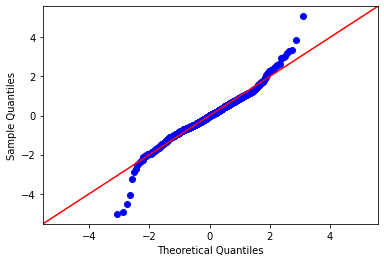

In [61]:
#회귀분석의 진단을 위한 잔차확인
# 학습데이터의 잔차 확인

res = fitted_full_model.resid

# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

- **qqplot은 잔차의 정규성 가정을 확인하는 거임 회귀분석의 3가정 ( 잔차의 정규성예측값의 정규분포, x와 y의 선형관계)**
- **이정도면 굉장히 괜찮은 형태임 심한경우에는 아예 꼬불거림**


Text(0, 0.5, 'Residual')

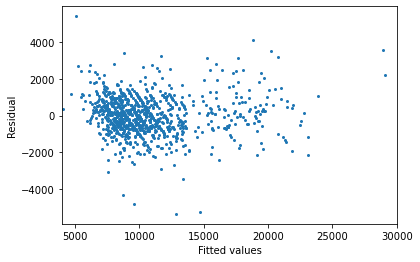

In [62]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

- **잔차들(resid)의 값이 y의 예측 값에 따라서 어떠한 형태를 보이고 있지 않음 좀 몰려있기는 하지만 y의 예측 값에 따라서 잔차가 균등하게 분배되어 있는 수준임**

In [63]:
 ## 검증 데이터에 대한 예측(train이 아닌 test 데이터)
    
pred_y2 = fitted_full_model.predict(test_x)
    
    

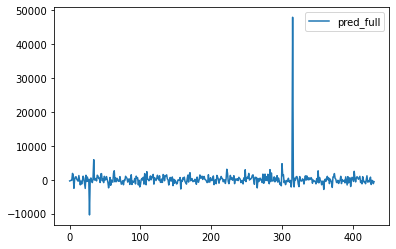

In [64]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
## MSE 성능 MSE성능은 scikit_learn함수에 있음 

mean_squared_error(y_true = test_y, y_pred = pred_y2)

6625376.5159127135

# 변수선택법

- **x와 y를 받고 feature를 받았을때 그 모델의 AIC만 RETURN하는 함수를 정의**
- **AIC는 모델의 성능지표로서 MSE에 변수 수만큼 penalty를 주는 지표**

In [68]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA7F316430>, 'AIC': 19096.133445410953}


In [69]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1da044175e0>,
 'AIC': 16936.677272021967}

- **상수항을 제외하고 k개에 대해서 모든 combination을 고려 하고 combo에 넣고 그 combo에 다시 상수항을 추가하고**
- **그 combo가 다시 feature_set으로 간 다음에 앞의 함수를 이용해 AIC반환**
- **그 중 AIC가 가장낮은 애를 best_model로 넣어 줌 
- **k개를 받아서 예를 들어 k가 2라면 변수에서 두 개의 변수 만 뽑아서 모든 조합을 고려해서 

In [75]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):  
        # 각 변수조합을 고려한 경우의 수
        print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

NameError: name 'models' is not defined

In [70]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
# k는 변수의 수
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k):  
        # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 3.7451415061950684 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                  17617
Name: 211, dtype: object


In [182]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

- **변수를 한 개씩 증가시켜 가면서 가장 좋은 모델을 뽑아 내는 것을 해봄**

In [77]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"]) # 빈 data_frame을 만듦 열 이름은 AIC와 model
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i) #get_best함수가 AIC가 가장 낮은 모델을 RETURN하므로 그 때 해당 K의 model을 가져옴?
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.11968135833740234 seconds.
Processed  630 models on 2 predictors in 1.6887962818145752 seconds.
Processed  7140 models on 3 predictors in 17.55849528312683 seconds.
Total elapsed time: 19.701072931289673 seconds.


- **3개의 변수를 고려한 것이 AIC가 가장 낮음**

In [184]:
models

,AIC,model
1,17829.429786,<statsmodels.regression.linear_model.Regressio...
2,17568.367339,<statsmodels.regression.linear_model.Regressio...
3,17419.349245,<statsmodels.regression.linear_model.Regressio...


- **이 모델에 대해서 다시 보고 싶다면 model.loc[3,'model].summary()**
- **AIC가 가장 낮은 최적의 모델을 선별 해줌 변수의 모델을 최적화 시켜주는 거지**

In [78]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2077.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:37:20   Log-Likelihood:                -8676.4
No. Observations:                1005   AIC:                         1.736e+04
Df Residuals:                    1001   BIC:                         1.738e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0249      0.001    -18.346      0.000      -0.028      -0.022
Mfg_Year    1450.4649     38.378     37.795      0.000    1375.155    1525.775
Weight        20.5481      1.000     20.557      0.000      18.587      22.510
const       -2.91e+06   7.62e+04    -38.177      0.000   -3.06e+06   -2.76e+06
==============================================================================
Omnibus:                      227.058   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1940.735
Skew:                          -0.781   Prob(JB):                         0.00
Kurtosis:                       9.626   Cond. No.                     1.40e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91451
full model AIC:  16936.67727
full model MSE:  13353267.47769
selected model Rsquared:  0.86161
selected model AIC:  17360.77805
selected model MSE:  13353267.47769


- **물론 모든 변수를 고려한 모델이 AIC가 가장 낮음 일반적으로 AIC가 모델을 선택할 때 많이 보는 지표임**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: 'argmin' is deprecated, use 

Text(0,0.5,'BIC')

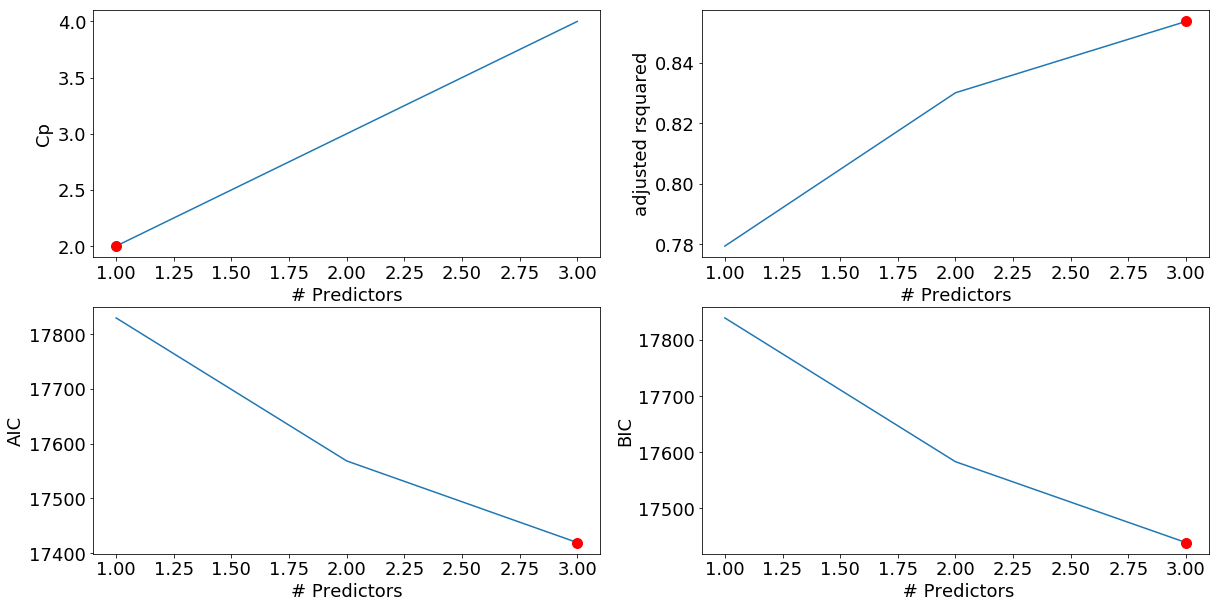

In [188]:
#성능지표의 시각화

# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp --> AIC와 BIC adj-rsquared 처럼 SSE를 가지고 만든 성능지표인데 파라미터의 수 만큼 패널티를 주는 성능지표
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

- **현실적으로 일반적인 DATA에서 모든 변수의 조합을 전부 조합할 수는 없다. SO 그래서 나온것이 변수 선택법이고 변수 선택법은 전진선택법 후진소거법 STEPWISE등이 있다.**

In [82]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors] #현재 predictors에서 남아있는 predictor
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

- **변수가 4개 있을 때 4개 중에 첫 번째 선택을 할 변수를 찾아야 됨 한 개가 선택이 됐을 때 나머지 predictor가 저기 remaining_predictors이고 나머지 3개의 변수에 대해서 하나씩 추가해 보면서 aic가 가장 낮은 것을 찾는것**

- **저 predictor는 현재 선택되어 있는 변수이다. 

In [83]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors) #열 개의 변수를 다 넣어봐서 regression 돌린 다음에 forward result에 넣고
        
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before: #이전에 선택 된 모델의 aic가 현재 선택 된 모델의 aic보다 작으면 반복문 종료
                break
        Fmodels.loc[i] = Forward_result 
        predictors = Fmodels.loc[i]["model"].model.exog_names #forward result의 model과 aic가 각각 변수에 저장됨 
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [84]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.17852401733398438
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06E53580>
Processed  35 models on 2 predictors in 0.14960026741027832
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06D41F70>
Processed  34 models on 3 predictors in 0.15059804916381836
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06D6C700>
Processed  33 models on 4 predictors in 0.08876204490661621
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA05198100>
Processed  32 models on 5 predictors in 0.07480072975158691
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM'

In [85]:
Forward_best_model.aic

16921.74758586447

In [86]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     473.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:05:23   Log-Likelihood:                -8437.9
No. Observations:                1005   AIC:                         1.692e+04
Df Residuals:                     982   BIC:                         1.703e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1082.3123    127.260      8.505      0.000     832.580    1332.045
Automatic_airco   1973.1226    188.813     10.450      0.000    1602.599    2343.647
KM                  -0.0158      0.001    -12.461      0.000      -0.018      -0.013
Weight              16.0347      1.268     12.643      0.000      13.546      18.524
HP                  38.2808      3.086     12.405      0.000      32.225      44.337
Powered_Windows    303.3635     86.115      3.523      0.000     134.373     472.354
BOVAG_Guarantee    638.3749    134.181      4.758      0.000     375.060     901.690
Guarantee_Period    76.8355     13.721      5.600      0.000      49.909     103.762
cc                  -2.9502      0.336     -8.777      0.000      -3.610      -2.291
Quarterly_Tax       15.9966      1.614      9.913      0.000      12.830      19.163
CNG              -2645.2284    350.058     -7.557      0.000   -3332.175   -1958.282
Mfr_Guarantee      247.1401     75.207      3.286      0.001      99.556     394.724
Airco              238.0733     89.405      2.663      0.008      62.626     413.520
Sport_Model        296.8599     86.840      3.418      0.001     126.447     467.272
Backseat_Divider  -378.9148    118.502     -3.198      0.001    -611.460    -146.369
ABS               -302.2813    102.538     -2.948      0.003    -503.501    -101.062
Age_08_04          -24.9365     10.580     -2.357      0.019     -45.698      -4.175
Radio_cassette    -184.7795    102.625     -1.801      0.072    -386.169      16.610
Boardcomputer     -240.3092    122.600     -1.960      0.050    -480.897       0.279
Automatic          261.8599    151.771      1.725      0.085     -35.972     559.692
Metallic_Rim       151.0051     91.720      1.646      0.100     -28.985     330.995
CD_Player          158.7499    101.858      1.559      0.119     -41.134     358.634
const             -2.17e+06   2.55e+05     -8.512      0.000   -2.67e+06   -1.67e+06
==============================================================================
Omnibus:                       70.658   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.714
Skew:                          -0.002   Prob(JB):                     3.08e-71
Kurtosis:                       5.785   Cond. No.                     5.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **위에서 문제가 있던 변수들을 일일이 소급법으로 제거하지 않아도 잘 제거해줌**

# 후진소거법

In [87]:
######## 후진소거법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [88]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [89]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.3735177516937256
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06D34D90>
Processed  35 models on 34 predictors in 0.1929934024810791
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mf

In [90]:
Backward_best_model.aic

16922.553112572205

# 단계적 선택법

- **forward backward 번갈아 가면서 같이 함**

In [91]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before: #현재의 AIC가 이전의 AIC보다 높다면  STOP
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [92]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.11470484733581543
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06E5DE20>
forward
Processed  1 models on 0 predictors in 0.003988504409790039
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA0514F880>
Processed  35 models on 2 predictors in 0.11572027206420898
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06E5DE80>
forward
Processed  2 models on 1 predictors in 0.009973287582397461
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06DF5CA0>
Processed  34 models on 3 predictors in 0.11321711540222168
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.Re

Processed  15 models on 14 predictors in 0.0827784538269043
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Mfr_Guarantee', 'Sport_Model', 'Backseat_Divider', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06D348B0>
Processed  21 models on 16 predictors in 0.10172677040100098
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'Backseat_Divider', 'ABS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06E45730>
forward
Processed  16 models on 15 predictors in 0.06681990623474121
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_

Processed  23 models on 22 predictors in 0.1041562557220459
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'Backseat_Divider', 'ABS', 'Age_08_04', 'Radio_cassette', 'Boardcomputer', 'Automatic', 'Metallic_Rim', 'CD_Player', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06DF59A0>
backward
Processed  14 models on 23 predictors in 0.06683826446533203
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'Backseat_Divider', 'ABS', 'Age_08_04', 'Radio_cassette', 'Boardcomputer', 'Automatic', 'Metallic_Rim', 'CD_Player', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA06D34B50>
f

Processed  23 models on 22 predictors in 0.1276535987854004
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'Backseat_Divider', 'ABS', 'Age_08_04', 'Radio_cassette', 'Boardcomputer', 'Automatic', 'Metallic_Rim', 'CD_Player', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA07FF0E20>
backward
Processed  14 models on 23 predictors in 0.05884194374084473
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'cc', 'Quarterly_Tax', 'CNG', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'Backseat_Divider', 'ABS', 'Age_08_04', 'Radio_cassette', 'Boardcomputer', 'Automatic', 'Metallic_Rim', 'CD_Player', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001DA348BE1F0>
f

In [93]:
Stepwise_best_model.aic

16921.74758586447

# 성능평가 

In [94]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(23,) (26,) (23,)


In [95]:
Forward_best_model.model.exog_names

['Mfg_Year',
 'Automatic_airco',
 'KM',
 'Weight',
 'HP',
 'Powered_Windows',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'cc',
 'Quarterly_Tax',
 'CNG',
 'Mfr_Guarantee',
 'Airco',
 'Sport_Model',
 'Backseat_Divider',
 'ABS',
 'Age_08_04',
 'Radio_cassette',
 'Boardcomputer',
 'Automatic',
 'Metallic_Rim',
 'CD_Player',
 'const']

- **test_x에서 여기 이 변수들을 가지고 와서 predict함**

In [96]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

- **빈 data_frame을 만듦**

In [100]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [101]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

- **MSE함수는 0부터 무한대의 값, MAPE는 PERCENTAGE의 값을 가짐**  

In [102]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   6.62538e+06  5.47053e+06  6.91986e+06  5.47053e+06
RMSE      2573.98      2338.92      2630.56      2338.92
MAE        884.06      871.069      883.889      871.069
MAPE      8.11752      8.05747      8.10527      8.05747


In [103]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
23
26
23


- **비슷한 성능이면 parameter의 수가 적은 것이 좋음 mape와 mae가 all보다 변수들을 선별한 것이 더 낮음 그러나 mse값은 all이 더 낮음 이렇게 애매 하면 사실 그냥 변수가 선별되어 작은 친구를 사용하는게 best임**